In [1]:
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pickle

from models.deepst.BikeNYC.exptBikeNYC import use_loaded_model, read_cache
from utils.config import Config
from utils.load_datasets import BikeNYC

In [2]:
model = use_loaded_model()

loading data...
[b'2014040101' b'2014040102' b'2014040103' ... b'2014093022' b'2014093023'
 b'2014093024']
incomplete days:  []
train_data shape:  (3720, 16, 8, 2)
min: 0.0 max: 267.0
XC shape:  (4224, 16, 8, 6) XP shape:  (4224, 16, 8, 2) XT shape:  (4224, 16, 8, 2) Y shape: (4224, 16, 8, 2)
XC shape:  (4224, 16, 8, 6) XP shape:  (4224, 16, 8, 2) XT shape:  (4224, 16, 8, 2) Y shape: (4224, 16, 8, 2)
train shape: (3552, 16, 8, 6) (3552, 16, 8, 2) test shape:  (672, 16, 8, 6) (672, 16, 8, 2)
(3552, 16, 8, 6)
(3552, 16, 8, 2)
(3552, 16, 8, 2)
(3552, 8)

(672, 16, 8, 6)
(672, 16, 8, 2)
(672, 16, 8, 2)
(672, 8)


 days (test):  [b'20140903', b'20140904', b'20140905', b'20140906', b'20140907', b'20140908', b'20140909', b'20140910', b'20140911', b'20140912', b'20140913', b'20140914', b'20140915', b'20140916', b'20140917', b'20140918', b'20140919', b'20140920', b'20140921', b'20140922', b'20140923', b'20140924', b'20140925', b'20140926', b'20140927', b'20140928', b'20140929', b'20140930']

el

In [3]:
len_closeness = 3  # length of closeness dependent sequence
len_period = 1  # length of peroid dependent sequence
len_trend = 1  # length of trend dependent sequence

In [4]:
def load_obj(file_path):
    with open(file_path + '.pkl', 'rb') as f:
        return pickle.load(f)

In [5]:
X_train, Y_train, X_test, Y_test, mmn, external_dim, timestamp_train, timestamp_test = BikeNYC.load_data(
            T=24, nb_flow=2, len_closeness=len_closeness, len_period=len_period, len_trend=len_trend, len_test=24*7*4,
            preprocess_name='preprocessing.pkl', meta_data=True)

[b'2014040101' b'2014040102' b'2014040103' ... b'2014093022' b'2014093023'
 b'2014093024']
incomplete days:  []
train_data shape:  (3720, 16, 8, 2)
min: 0.0 max: 267.0
XC shape:  (4224, 16, 8, 6) XP shape:  (4224, 16, 8, 2) XT shape:  (4224, 16, 8, 2) Y shape: (4224, 16, 8, 2)
XC shape:  (4224, 16, 8, 6) XP shape:  (4224, 16, 8, 2) XT shape:  (4224, 16, 8, 2) Y shape: (4224, 16, 8, 2)
train shape: (3552, 16, 8, 6) (3552, 16, 8, 2) test shape:  (672, 16, 8, 6) (672, 16, 8, 2)
(3552, 16, 8, 6)
(3552, 16, 8, 2)
(3552, 16, 8, 2)
(3552, 8)

(672, 16, 8, 6)
(672, 16, 8, 2)
(672, 16, 8, 2)
(672, 8)



In [6]:
Y_pred = model.predict(X_test)

mmn = load_obj("preprocessing")

data = mmn.inverse_transform(Y_test)
data_pred = np.array(mmn.inverse_transform(Y_pred), dtype=int)

In [27]:
RESULTDIR = "results/"+str(int(datetime.datetime.now().timestamp()))
if os.path.isdir("results") is False:
    os.mkdir("results")
    if os.path.isdir(RESULTDIR) is False:
        os.mkdir(RESULTDIR)

### Print outflow heatmap NYC dataset

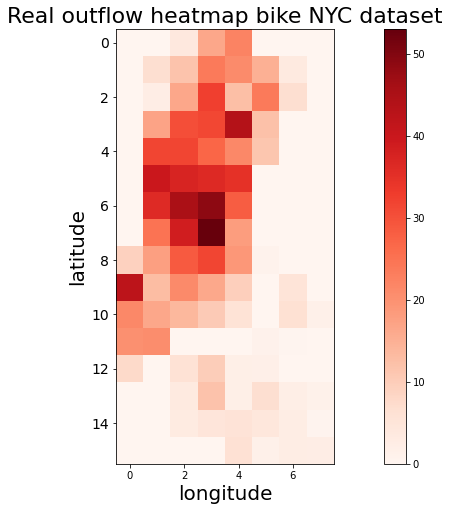

In [7]:
f = plt.figure(figsize=(18,8))
ax = f.add_subplot(1,1,1)
plt.ylabel('latitude',fontsize=20)
plt.xlabel('longitude',fontsize=20)
plt.yticks(fontsize=14)
plt.title("Real outflow heatmap bike NYC dataset", fontsize=22)
flow = 1
heatmap = data[0, :, :, flow]
for img in data[1:]:
    heatmap += img[:, :, flow]
heatmap /= data.shape[0]
plt.imshow(heatmap, cmap='Reds', interpolation='nearest')
plt.colorbar()
plt.show()

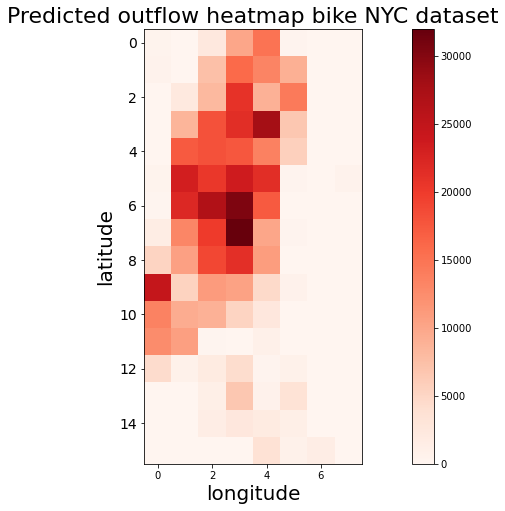

In [8]:
f = plt.figure(figsize=(18,8))
ax = f.add_subplot(1,1,1)
plt.ylabel('latitude',fontsize=20)
plt.xlabel('longitude',fontsize=20)
plt.yticks(fontsize=14)
plt.title("Predicted outflow heatmap bike NYC dataset", fontsize=22)
flow = 1
heatmap = data_pred[0, :, :, flow]
for img in data_pred[1:]:
    heatmap += img[:, :, flow]

plt.imshow(heatmap, cmap='Reds', interpolation='nearest')
plt.colorbar()
plt.show()

### Print difference using an heatmap between actual data and predicted ones

In [27]:
# data_diff = np.abs(Y_pred - Y_test)
# data_diff = np.abs(data_pred - data)
# Check error division by 0
data_diff = np.abs(data_pred - data)
data_diff /= data 

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

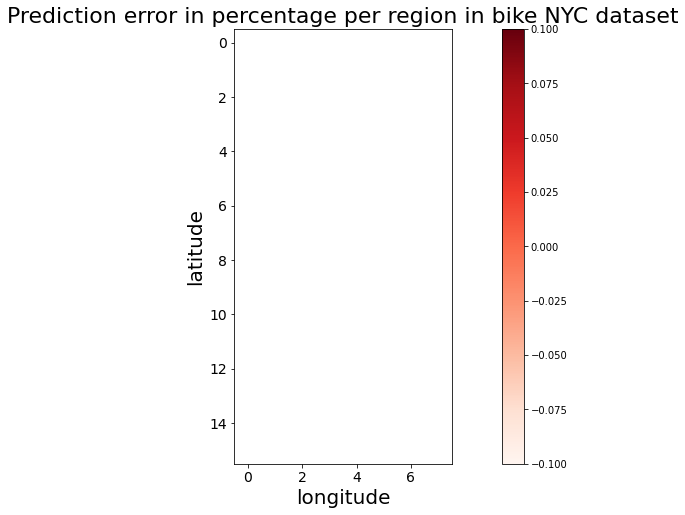

In [15]:
f = plt.figure(figsize=(18,8))
ax = f.add_subplot(1,1,1)
plt.ylabel('latitude',fontsize=20)
plt.xlabel('longitude',fontsize=20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.title("Prediction error in percentage per region in bike NYC dataset", fontsize=22)
flow = 1
heatmap = data_diff[0, :, :, flow]
for img in data_diff[1:]:
    heatmap += img[:, :, flow]
heatmap /= data_diff.shape[0]
heatmap *=100

plt.imshow(heatmap, cmap='Reds', interpolation='nearest')
plt.colorbar()
plt.show()

### Plot one week flow for office area

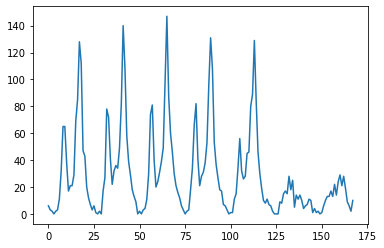

In [21]:
# Apr. 1st to Sept. 30th 2014 last 28 days as test data
start_date = 5
sampling = 24
location = (2,3)
flow = 0

start_date *= sampling
plt.plot(list(range(7*sampling)), data[start_date:start_date+7*sampling,location[0],location[1],flow])

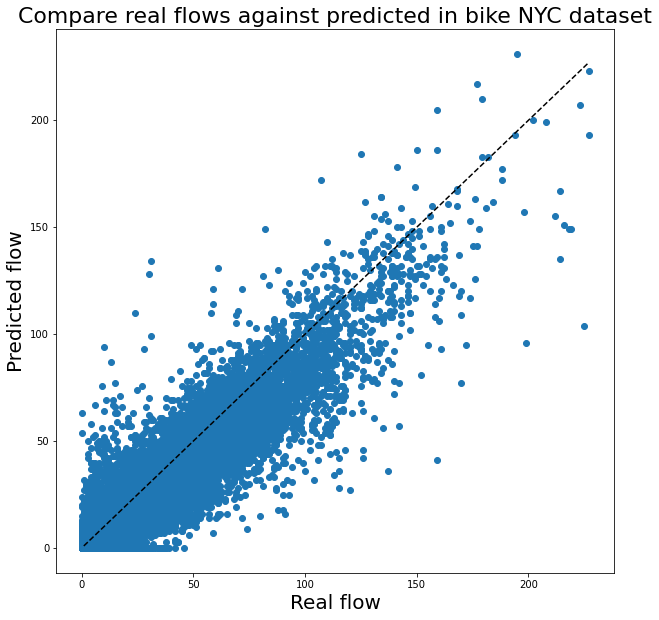

<Figure size 432x288 with 0 Axes>

In [23]:
f = plt.figure(figsize=(10,10))
ax = f.add_subplot(1,1,1)
plt.ylabel('Predicted flow',fontsize=20)
plt.xlabel('Real flow',fontsize=20)
plt.title("Compare real flows against predicted in bike NYC dataset", fontsize=22)
start_date = 4
sampling = 24
location = (7,3)
flow = 1
plt.scatter(
    # data_pred[start_date:start_date+7*sampling,:,:,flow].flatten(),
    # data[start_date:start_date+7*sampling,:,:,flow].flatten())
    data[30:672,:,:,flow],
    data_pred[30:672,:,:,flow])
# plt.loglog()
x = np.logspace(0, np.log10(np.max(data)))
plt.plot(x, x, '--k')
plt.show()
plt.savefig("comparison.png")

### Plot daily flow

In [64]:
daily_flow_per_area = np.zeros((24, data.shape[1], data.shape[2]))
flow = 1
for i, el in enumerate(data[:,:,:,flow]):
    daily_flow_per_area[i%24] = el

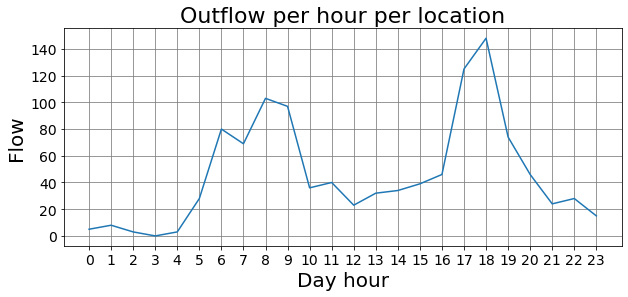

In [66]:
f = plt.figure(figsize=(10,4))
ax = f.add_subplot(1,1,1)
plt.ylabel('Flow',fontsize=20)
plt.xlabel('Day hour',fontsize=20)
plt.title("Outflow per hour per location", fontsize=22)
plt.yticks(fontsize=14)
plt.xticks(list(range(24)), fontsize=14)
plt.grid(color='gray')
location = (2,3)
plt.plot(list(range(24)), daily_flow_per_area[:,location[0],location[1]])

In [62]:
daily_flow = np.zeros(24)
for x in range(daily_flow_per_area.shape[1]):
    for y in range(daily_flow_per_area.shape[2]):
        daily_flow += daily_flow_per_area[:,x,y]

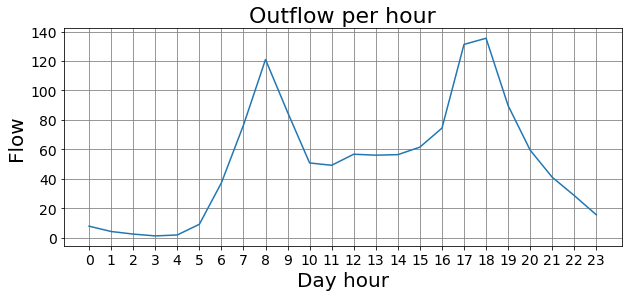

In [63]:
f = plt.figure(figsize=(10,4))
ax = f.add_subplot(1,1,1)
plt.ylabel('Flow',fontsize=20)
plt.xlabel('Day hour',fontsize=20)
plt.title("Outflow per hour", fontsize=22)
plt.yticks(fontsize=14)
plt.xticks(list(range(24)), fontsize=14)
plt.grid(color='gray')
# ax.set_axisbelow(True)
# ax.set_facecolor('#E0E0E0')
location = (2,3)
plt.plot(list(range(24)), daily_flow)

#Aggiungere griglia